In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import time
from scipy.misc import imread
import gmaps 
from config import gkey
gmaps.configure(api_key=gkey)

In [130]:
# ------------------------------------ Cleanup CSV files --------------------------------------------------------

# Get sources of raw data for cleanup
species_filename1 = "../Data/Clean/Monarch/Monarch_clean.csv"
species_filename2 = "../Data/Clean/Whale/Blue_Whale.csv"
species_filename3 = "../Data/Clean/Whale/Humpback_whale.csv"
species_filename4 = "../Data/Clean/Tern/Arctic Tern.csv"

# Reading csv files
df_monarch = pd.read_csv(species_filename1)
df_blue_whale = pd.read_csv(species_filename2)
df_humpback_whale = pd.read_csv(species_filename3)
df_arctic_tern = pd.read_csv(species_filename4)

In [4]:
df_blue_whale.head()

,event-id,timestamp,location-long,location-lat,individual-taxon-canonical-name,tag-local-identifier,individual-local-identifier
0,8393723602,1994-09-15 01:53:29.000,-123.288,37.554,Balaenoptera musculus,1994CA-ST10-10823,1994CA-Bmu-10823
1,8393723603,1994-09-15 03:22:44.000,-122.581,37.440,Balaenoptera musculus,1994CA-ST10-10823,1994CA-Bmu-10823
2,8393723604,1994-09-15 04:06:31.000,-123.611,37.693,Balaenoptera musculus,1994CA-ST10-10823,1994CA-Bmu-10823
3,8393723605,1994-09-15 12:35:24.000,-122.977,37.880,Balaenoptera musculus,1994CA-ST10-10823,1994CA-Bmu-10823
4,8393723606,1994-09-15 16:21:18.000,-123.162,37.760,Balaenoptera musculus,1994CA-ST10-10823,1994CA-Bmu-10823


In [5]:
df_blue_whale['Date'], df_blue_whale['Time'] = zip(*df_blue_whale.timestamp.str.split())


In [6]:
df_blue_whale = df_blue_whale.drop(columns=['timestamp'])

In [7]:
df_blue_whale['year'] = pd.DatetimeIndex(df_blue_whale['Date']).year
df_blue_whale['month'] = pd.DatetimeIndex(df_blue_whale['Date']).month

In [8]:
df_blue_whale["year"].value_counts()

2008    3371
2004    2500
2007    2023
2005    1815
1999    1625
1998     949
2000     823
2001     713
2006     712
2002     505
1995     482
2009     224
1994     106
Name: year, dtype: int64

In [9]:
df_blue_whale = df_blue_whale.rename(columns={"location-lat":"latitude","location-long":"longitude"})


In [19]:
df_blue_whale = df_blue_whale.dropna(subset = ['latitude','longitude','Date'])
blue_whale_1999 = df_blue_whale.loc[df_blue_whale['year'] == 1999]
blue_whale_2005 = df_blue_whale.loc[df_blue_whale['year'] == 2005]
blue_whale_2007 = df_blue_whale.loc[df_blue_whale['year'] == 2007]
blue_whale_2008 = df_blue_whale.loc[df_blue_whale['year'] == 2008]

In [20]:
lat_mean_1999 = blue_whale_1999.groupby(["year","month"])["latitude"].mean()
lat_mean_2005 = blue_whale_2005.groupby(["year","month"])["latitude"].mean()
lat_mean_2007 = blue_whale_2007.groupby(["year","month"])["latitude"].mean()
lat_mean_2008 = blue_whale_2008.groupby(["year","month"])["latitude"].mean()

In [21]:
lat_mean_1999

year  month
1999  1         9.569000
      2        18.611000
      3        30.782880
      4        34.152200
      7        34.247541
      8        33.803050
      9        35.517136
      10       33.040562
      11       26.311289
      12       21.192822
Name: latitude, dtype: float64

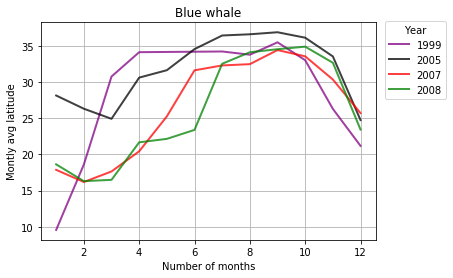

In [12]:
plt.plot(np.sort(blue_whale_1999.month.unique()),mean_1999,alpha = 0.75,color = 'purple',linewidth=2.0,label="1999")
plt.plot(np.sort(blue_whale_2005.month.unique()),mean_2005,alpha = 0.75,color = 'black',linewidth=2.0,label="2005")
plt.plot(np.sort(blue_whale_2007.month.unique()),mean_2007, alpha = 0.75,color = 'red',linewidth=2.0,label="2007")
plt.plot(np.sort(blue_whale_2008.month.unique()),mean_2008 ,alpha = 0.75,color = 'green',linewidth=2.0,label="2008")
plt.xlabel("Number of months")
plt.ylabel("Montly avg latitude")
plt.title("Blue whale")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))

In [13]:
fig = gmaps.figure()
fig

Figure(layout=FigureLayout(height='420px'))

In [49]:
lng_mean_1999 = blue_whale_1999.groupby(["year","month"])["longitude"].mean()
lng_mean_2005 = blue_whale_2005.groupby(["year","month"])["longitude"].mean()
lng_mean_2007 = blue_whale_2007.groupby(["year","month"])["longitude"].mean()
lng_mean_2008 = blue_whale_2008.groupby(["year","month"])["longitude"].mean()

In [55]:
df_1999 = pd.DataFrame({"Avg latitude": lat_mean_1999,
                        "Avg longitude":lng_mean_1999 })
df_2005 = pd.DataFrame({"Avg latitude": lat_mean_2005,
                        "Avg longitude":lng_mean_2005 })
df_2007 = pd.DataFrame({"Avg latitude": lat_mean_2007,
                        "Avg longitude":lng_mean_2007 })
df_2008 = pd.DataFrame({"Avg latitude": lat_mean_2008,
                        "Avg longitude":lng_mean_2008 })

In [57]:
cord1999 =[]
for lat, lng in df_1999.itertuples(index=False):
    cord1999.append([lat,lng])
cord2005 =[]
for lat, lng in df_2005.itertuples(index=False):
    cord2005.append([lat,lng])
cord2007 =[]
for lat, lng in df_2007.itertuples(index=False):
    cord2007.append([lat,lng])
cord2008 =[]
for lat, lng in df_2008.itertuples(index=False):
    cord2008.append([lat,lng])   


In [63]:
mrk1999 = gmaps.symbol_layer(cord1999,fill_color='white', stroke_color='green', scale=4)
mrk2005 = gmaps.symbol_layer(cord2005,fill_color='white', stroke_color='purple', scale=4)
mrk2007 = gmaps.symbol_layer(cord2007,fill_color='white', stroke_color='red', scale=4)
mrk2008 = gmaps.symbol_layer(cord2008,fill_color='white', stroke_color='black', scale=4)
fig.add_layer(mrk1999)
fig.add_layer(mrk2005)
fig.add_layer(mrk2007)
fig.add_layer(mrk2008)
fig

Figure(layout=FigureLayout(height='420px'))

In [75]:
df_humpback_whale.head()

,geom,oid,longitude,latitude,providers,species,datasets,date_min,date_max,num_records,num_animals,csquare,geom_wkt
0,0103000020E61000000100000005000000000000000060...,5823119,-180,-17,Wildlife Conservation Society,Megaptera novaeangliae,885,8/1/1913,8/1/1913,1,1.0,5117:479,"POLYGON((-179 -17,-179 -18,-180 -18,-180 -17,-..."
1,0103000020E61000000100000005000000000000000060...,180494,-180,61,National Marine Mammal Laboratory,Megaptera novaeangliae,821,7/18/2008,7/18/2008,2,2.0,7617:209,"POLYGON((-179 60,-180 60,-180 61,-179 61,-179 ..."
2,0103000020E61000000100000005000000000000000060...,180338,-180,62,National Marine Mammal Laboratory,Megaptera novaeangliae,821,7/31/2010,7/31/2010,1,3.0,7617:229,"POLYGON((-179 62,-180 62,-180 63,-179 63,-179 ..."
3,0103000020E61000000100000005000000000000000040...,180589,-178,60,National Marine Mammal Laboratory,Megaptera novaeangliae,821,7/29/2010,7/30/2010,5,6.0,7517:498,"POLYGON((-178 59,-179 59,-179 60,-178 60,-178 ..."
4,0103000020E61000000100000005000000000000000020...,5823772,-177,-23,Wildlife Conservation Society,Megaptera novaeangliae,885,10/1/1913,10/1/1913,3,3.0,5217:237,"POLYGON((-177 -23,-177 -24,-178 -24,-178 -23,-..."


In [76]:
df_humpback_whale = df_humpback_whale.drop(columns=['geom','geom_wkt'])

In [77]:
df_humpback_whale = df_humpback_whale.rename(columns={"oid":"Ocean id"})

In [78]:
df_humpback_whale.head()

,Ocean id,longitude,latitude,providers,species,datasets,date_min,date_max,num_records,num_animals,csquare
0,5823119,-180,-17,Wildlife Conservation Society,Megaptera novaeangliae,885,8/1/1913,8/1/1913,1,1.0,5117:479
1,180494,-180,61,National Marine Mammal Laboratory,Megaptera novaeangliae,821,7/18/2008,7/18/2008,2,2.0,7617:209
2,180338,-180,62,National Marine Mammal Laboratory,Megaptera novaeangliae,821,7/31/2010,7/31/2010,1,3.0,7617:229
3,180589,-178,60,National Marine Mammal Laboratory,Megaptera novaeangliae,821,7/29/2010,7/30/2010,5,6.0,7517:498
4,5823772,-177,-23,Wildlife Conservation Society,Megaptera novaeangliae,885,10/1/1913,10/1/1913,3,3.0,5217:237


In [80]:
df_humpback_whale = df_humpback_whale.dropna(subset = ['latitude','longitude','date_min'])
df_humpback_whale['year'] = pd.DatetimeIndex(df_humpback_whale['date_min']).year
df_humpback_whale['month']= pd.DatetimeIndex(df_humpback_whale['date_min']).month

In [86]:
df_humpback_whale =df_humpback_whale.dropna(how='any')

In [88]:
np.sort(df_humpback_whale["year"].unique())

array([1839, 1901, 1910, 1913, 1922, 1924, 1925, 1927, 1928, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1942, 1943, 1945,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1962, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018], dtype=int64)

In [642]:
humpback_1992 = df_humpback_whale.loc[df_humpback_whale['year'] == 1992]
humpback_1997 = df_humpback_whale.loc[df_humpback_whale['year'] == 1997]
humpback_2000 = df_humpback_whale.loc[df_humpback_whale['year'] == 2000]
humpback_2006 = df_humpback_whale.loc[df_humpback_whale['year'] == 2006]
humpback_2016 = df_humpback_whale.loc[df_humpback_whale['year'] == 2016]

In [643]:
lat_mean_1992 = humpback_1992.groupby(["year","month"])["latitude"].mean()
lat_mean_1997 = humpback_1997.groupby(["year","month"])["latitude"].mean()
lat_mean_2000 = humpback_1999.groupby(["year","month"])["latitude"].mean()
lat_mean_2006 = humpback_2006.groupby(["year","month"])["latitude"].mean()
lat_mean_2016 = humpback_2016.groupby(["year","month"])["latitude"].mean()

year  month
2000  2        -1.000000
      3        -3.428571
      5        39.000000
      6        51.428571
      7        30.000000
      8         6.000000
      10      -10.333333
      11       -1.666667
      12      -56.000000
Name: latitude, dtype: float64

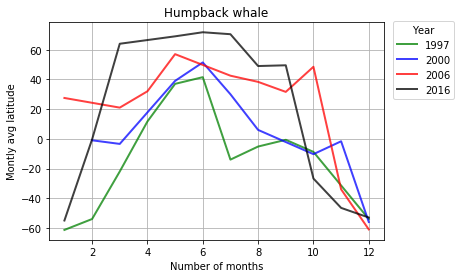

In [645]:
#plt.plot(np.sort(humpback_1991.month.unique()),lat_mean_1991,alpha = 0.75,color = 'purple',linewidth=2.0)
plt.plot(np.sort(humpback_1997.month.unique()),lat_mean_1997,alpha = 0.75,color = 'green',linewidth=2.0,label = "1997")
plt.plot(np.sort(humpback_2000.month.unique()),lat_mean_2000,alpha = 0.75,color = 'blue',linewidth=2.0,label = "2000")
plt.plot(np.sort(humpback_2006.month.unique()),lat_mean_2006,alpha = 0.75,color = 'red',linewidth=2.0,label = "2006")
plt.plot(np.sort(humpback_2016.month.unique()),lat_mean_2016,alpha = 0.75,color = 'black',linewidth=2.0,label = "2016")
plt.xlabel("Number of months")
plt.ylabel("Montly avg latitude")
plt.title("Humpback whale")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))

In [131]:
df_arctic_tern = df_arctic_tern.drop(columns=['geom','datasets','num_species','csquare','geom_wkt'])
#df_arctic_tern.head()

In [4]:
arctic_adj = df_arctic_tern.dropna(subset = ['latitude','longitude','date_min'])
arctic_adj['year'] = pd.DatetimeIndex(arctic_adj['date_min']).year
arctic_adj['month']= pd.DatetimeIndex(arctic_adj['date_min']).month

In [124]:
# Preparing data from Jan-Dec
arctic_2014 = arctic_adj.loc[arctic_adj['year'] == 2014]
arctic_2011 = arctic_adj.loc[arctic_adj['year'] == 2011]
arctic_2009 = arctic_adj.loc[arctic_adj['year'] == 2009]
arctic_2008 = arctic_adj.loc[arctic_adj['year'] == 2008]
arctic_2007 = arctic_adj.loc[arctic_adj['year'] == 2007]

arctic_1995 = arctic_adj.loc[arctic_adj['year'] == 1995]
arctic_1992 = arctic_adj.loc[arctic_adj['year'] == 1992]
arctic_1991 = arctic_adj.loc[arctic_adj['year'] == 1991]

arctic_1985 = arctic_adj.loc[arctic_adj['year'] == 1985]
arctic_1984 = arctic_adj.loc[arctic_adj['year'] == 1984]
arctic_1981 = arctic_adj.loc[arctic_adj['year'] == 1981]
arctic_1980 = arctic_adj.loc[arctic_adj['year'] == 1980]

In [125]:
arctic_mean_2014 = arctic_2014.groupby(['month']).mean()
arctic_mean_2014.reset_index(drop=False,inplace=True)
arctic_std_2014 = arctic_2014.groupby(["year","month"])["latitude"].sem()

arctic_mean_2011 = arctic_2011.groupby(['month']).mean()
arctic_mean_2011.reset_index(drop=False,inplace=True)
arctic_std_2011 = arctic_2011.groupby(["year","month"])["latitude"].sem()

arctic_mean_2009 = arctic_2009.groupby(['month']).mean()
arctic_mean_2009.reset_index(drop=False,inplace=True)
arctic_std_2009 = arctic_2009.groupby(["year","month"])["latitude"].sem()


arctic_mean_2008 = arctic_2008.groupby(['month']).mean()
arctic_mean_2008.reset_index(drop=False,inplace=True)
arctic_std_2008 = arctic_2008.groupby(["year","month"])["latitude"].sem()

arctic_mean_2007 = arctic_2007.groupby(['month']).mean()
arctic_mean_2007.reset_index(drop=False,inplace=True)
arctic_std_2007 = arctic_2007.groupby(["year","month"])["latitude"].sem()

arctic_mean_1995 = arctic_1995.groupby(['month']).mean()
arctic_mean_1995.reset_index(drop=False,inplace=True)
arctic_std_1995 = arctic_1995.groupby(["year","month"])["latitude"].sem()

arctic_mean_1991 = arctic_1991.groupby(['month']).mean()
arctic_mean_1991.reset_index(drop=False,inplace=True)
arctic_std_1991 = arctic_1991.groupby(["year","month"])["latitude"].sem()

arctic_mean_1985 = arctic_1985.groupby(['month']).mean()
arctic_mean_1985.reset_index(drop=False,inplace=True)
arctic_std_1985 = arctic_1985.groupby(["year","month"])["latitude"].sem()

arctic_mean_1984 = arctic_1984.groupby(['month']).mean()
arctic_mean_1984.reset_index(drop=False,inplace=True)
arctic_std_1984 = arctic_1984.groupby(["year","month"])["latitude"].sem()

arctic_mean_1981 = arctic_1981.groupby(['month']).mean()
arctic_mean_1981.reset_index(drop=False,inplace=True)
arctic_std_1981 = arctic_1981.groupby(["year","month"])["latitude"].sem()

arctic_mean_1980 = arctic_1980.groupby(['month']).mean()
arctic_mean_1980.reset_index(drop=False,inplace=True)
arctic_std_1980 = arctic_1980.groupby(["year","month"])["latitude"].sem()

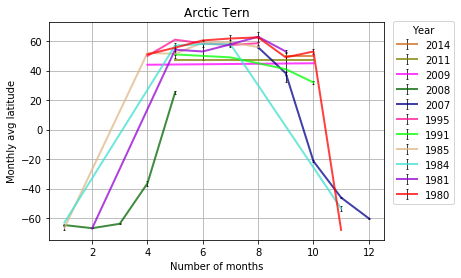

In [126]:
plt.errorbar(arctic_mean_2014.month,arctic_mean_2014.latitude,yerr=arctic_std_2014,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'chocolate',linewidth=2.0,label = "2014")
plt.errorbar(arctic_mean_2011.month,arctic_mean_2011.latitude,yerr=arctic_std_2011,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'olive',linewidth=2.0,label = "2011")
plt.errorbar(arctic_mean_2009.month,arctic_mean_2009.latitude,yerr=arctic_std_2009,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'fuchsia',linewidth=2.0,label = "2009")
plt.errorbar(arctic_mean_2008.month,arctic_mean_2008.latitude,yerr=arctic_std_2008,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'darkgreen',linewidth=2.0,label = "2008")
plt.errorbar(arctic_mean_2007.month,arctic_mean_2007.latitude,yerr=arctic_std_2007,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'darkblue',linewidth=2.0,label = "2007")
plt.errorbar(arctic_mean_1995.month,arctic_mean_1995.latitude,yerr=arctic_std_1995,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'deeppink',linewidth=2.0,label = "1995")
plt.errorbar(arctic_mean_1991.month,arctic_mean_1991.latitude,yerr=arctic_std_1991,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'lime',linewidth=2.0,label = "1991")
plt.errorbar(arctic_mean_1985.month,arctic_mean_1985.latitude,yerr=arctic_std_1985,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'burlywood',linewidth=2.0,label = "1985")
plt.errorbar(arctic_mean_1984.month,arctic_mean_1984.latitude,yerr=arctic_std_1984,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'turquoise',linewidth=2.0,label = "1984")
plt.errorbar(arctic_mean_1981.month,arctic_mean_1981.latitude,yerr=arctic_std_1981,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'darkviolet',linewidth=2.0,label = "1981")
plt.errorbar(arctic_mean_1980.month,arctic_mean_1980.latitude,yerr=arctic_std_1980,ecolor='black',capsize=1,elinewidth=1,alpha = 0.75,color = 'red',linewidth=2.0,label = "1980")

plt.xlabel("Number of months")
plt.ylabel("Monthly avg latitude")
plt.title("Arctic Tern")
plt.grid()
plt.legend(title="Year",loc='upper right', bbox_to_anchor=(1.225, 1.03))
plt.show()

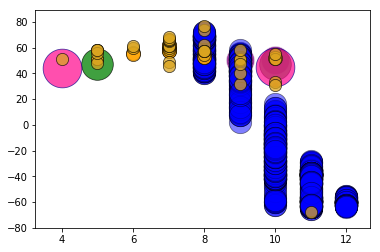

In [43]:
plt.scatter(arctic_2014.month,arctic_2014.latitude,s=800,alpha = 0.75,color = 'purple',edgecolor = 'whitesmoke',linewidth=0.75)
plt.scatter(arctic_2011.month,arctic_2011.latitude,s=1000,alpha = 0.75,color = 'green',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_2009.month,arctic_2009.latitude,s=1500,alpha = 0.75,color = 'deeppink',edgecolor = 'darkblue',linewidth=0.75)
plt.scatter(arctic_2007.month,arctic_2007.latitude,s=500, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_2003.month,arctic_2003.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'whitesmoke',linewidth=0.75)
plt.scatter(arctic_1994.month,arctic_1994.latitude,s=200,alpha = 0.75,color = 'orange',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1991.month,arctic_1991.latitude,s=150,alpha = 0.75,color = 'goldenrod',edgecolor = 'black',linewidth=0.75)
plt.scatter(arctic_1980.month,arctic_1980.latitude,s=150,alpha = 0.75,color = 'goldenrod',edgecolor = 'black',linewidth=0.75)

In [9]:
df_monarch.head()

,id,observed_on_string,observed_on,quality_grade,license,latitude,longitude,positional_accuracy,scientific_name,common_name
0,621484,4/12/2014 16:09,4/12/2014,research,CC-BY-NC,35.511898,-93.323380,27.0,Danaus plexippus,Monarch
1,768989,6/29/2014,6/29/2014,research,CC-BY-NC,35.513389,-93.326598,3.0,Danaus plexippus,Monarch
2,837014,8/17/2014,8/17/2014,research,CC-BY-NC,35.507590,-93.315497,13.0,Danaus plexippus,Monarch
3,866569,9/7/2014,9/7/2014,research,CC-BY-NC,35.512094,-93.326470,27.0,Danaus plexippus,Monarch
4,875141,9/13/2014,9/13/2014,research,CC-BY-NC,35.513659,-93.318597,3.0,Danaus plexippus,Monarch


monarch_adj = df_monarch.dropna(subset = ['latitude','longitude','observed_on'])
monarch_adj['year'] = pd.DatetimeIndex(monarch_adj['observed_on']).year
monarch_adj['month']= pd.DatetimeIndex(monarch_adj['observed_on']).month
monarch_2014 = monarch_adj.loc[monarch_adj['year'] == 2014]
monarch_2015 = monarch_adj.loc[monarch_adj['year'] == 2015]
monarch_2016 = monarch_adj.loc[monarch_adj['year'] == 2016]
monarch_2017 = monarch_adj.loc[monarch_adj['year'] == 2017]
monarch_2018 = monarch_adj.loc[monarch_adj['year'] == 2018]

monarch_2014.count()


In [42]:
#-------------cleanup--------------
monarch_2014[count = monarch_2014.groupby(['year','month'])['latitude'].count()
lat_count_2015 = monarch_2015.groupby(['year','month'])['latitude'].count()
lat_count_2016 = monarch_2016.groupby(['year','month'])['latitude'].count()
lat_count_2017 = monarch_2017.groupby(['year','month'])['latitude'].count()
lat_count_2018 = monarch_2018.groupby(['year','month'])['latitude'].count()
lat_mean_2014 = monarch_2014.groupby(['year','month'])['longitude'].mean()
lat_mean_2015 = monarch_2015.groupby(['year','month'])['longitude'].mean()
lat_mean_2016 = monarch_2016.groupby(['year','month'])['longitude'].mean()
lat_mean_2017 = monarch_2017.groupby(['year','month'])['longitude'].mean()
lat_mean_2018 = monarch_2018.groupby(['year','month'])['longitude'].mean()
monarch_2014.head()



,id,observed_on_string,observed_on,quality_grade,license,latitude,longitude,positional_accuracy,scientific_name,common_name,year,month
0,621484,4/12/2014 16:09,4/12/2014,research,CC-BY-NC,35.511898,-93.323380,27.0,Danaus plexippus,Monarch,2014,4
1,768989,6/29/2014,6/29/2014,research,CC-BY-NC,35.513389,-93.326598,3.0,Danaus plexippus,Monarch,2014,6
2,837014,8/17/2014,8/17/2014,research,CC-BY-NC,35.507590,-93.315497,13.0,Danaus plexippus,Monarch,2014,8
3,866569,9/7/2014,9/7/2014,research,CC-BY-NC,35.512094,-93.326470,27.0,Danaus plexippus,Monarch,2014,9
4,875141,9/13/2014,9/13/2014,research,CC-BY-NC,35.513659,-93.318597,3.0,Danaus plexippus,Monarch,2014,9


In [37]:
stderr_lon_2017=monarch_2017.longitude.sem(axis=0)
stderr_lat_2017=monarch_2017.latitude.sem(axis=0)
stderr_lon_2018=monarch_2017.longitude.sem(axis=0)
stderr_lon_2018=monarch_2017.latitude.sem(axis=0)




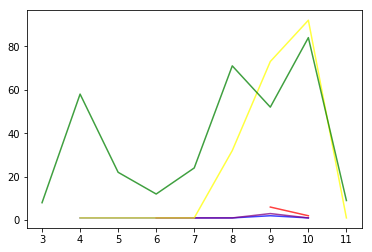

In [38]:
plt.plot(np.sort(monarch_2014.month.unique()),lat_mean_2014,alpha = 0.75,color = 'blue')
plt.plot(np.sort(monarch_2015.month.unique()),lat_mean_2015,alpha = 0.75,color = 'red')
plt.plot(np.sort(monarch_2016.month.unique()),lat_mean_2016,alpha = 0.75,color = 'purple')
plt.plot(np.sort(monarch_2017.month.unique()),lat_mean_2017,alpha = 0.75,color = 'yellow')
plt.plot(np.sort(monarch_2018.month.unique()),lat_mean_2018,alpha = 0.75,color = 'green')
plt.show()

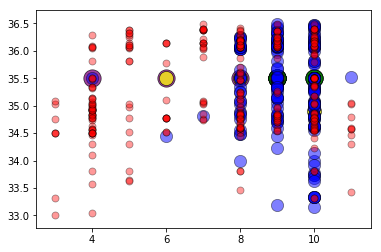

In [12]:
plt.scatter(monarch_2014.month,monarch_2014.latitude,s=300,alpha = 0.75,color = 'purple',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2015.month,monarch_2015.latitude,s=300,alpha = 0.75,color = 'green',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2016.month,monarch_2016.latitude,s=200,alpha = 0.75,color = 'yellow',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2017.month,monarch_2017.latitude,s=150, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.month,monarch_2018.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)

plt.show()

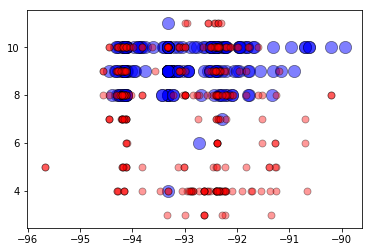

In [16]:
plt.scatter(monarch_2017.month,monarch_2017.latitude,s=150, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.month,monarch_2018.latitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)


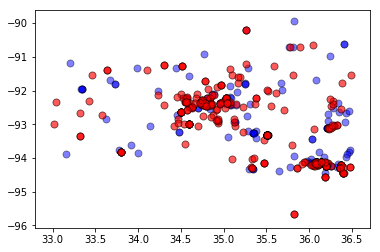

In [14]:
plt.scatter(monarch_2017.latitude,monarch_2017.longitude,s=50, alpha = 0.5,color = 'blue',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.latitude,monarch_2018.longitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)
plt.scatter(monarch_2018.latitude,monarch_2018.longitude,s=50 ,alpha = 0.4,color = 'red',edgecolor = 'black',linewidth=0.75)


In [15]:
ind = np.arange(monarch_adj.month)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
lon1 = plt.bar(ind, monarch_2017.longitude, width, yerr=stderr_lon_2017)
lon2 = plt.bar(ind, monarch_2018.longitude, width,
             bottom=monarch_2018.longitude, yerr=stderr_lon_2018)

plt.ylabel('Count')
plt.xticks(ind, ('4', '5', '6', '7', '8', '9', '10', '11', '12'))
plt.yticks(np.arange(0, 200, 10))

plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().